# Introduction to Bandstructure: Kronig-Penney model of a solid

This is a brief demonstration of what is possible in the notebook using a real model in physics. It is not intended to teach the details of the Kronig Penny model. 

Some things to bear in mind with this notebook:

* Although the notebook is running in a web-browser, everything is running on my personal laptop! No internet connection is required other than for features that need the internet (such as the YouTube integration below). 
* The notebook is fully editable - The text, the code, everything.

The notebook allows for several teaching styles.

* We could refer the student to the theory in Kittel http://eu.wiley.com/WileyCDA/WileyTitle/productCd-EHEP000803.html

* We could put the full theory here in the notebook. For example, here is the equation we need to solve to get the band structure of the Kronig-Penney model

$$\frac{\beta^2-\alpha^2}{2\alpha\beta} \sinh(\beta b) \sin(\alpha a) - \cosh(\beta b)\cos(\alpha a) = \cos(a+b)k$$

* We could include a video of a lecture..either locally or on YouTube. Here is a Kronig-Penney video I found on YouTube:



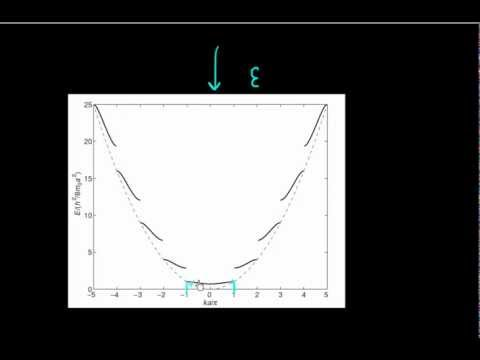

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("UhFW_6xhpJA")

We can do a step further and give the students executable code to allow them to calculate the bandstructure themselves.

Even if they don't understand the code, they can modify parameters and see what the results might be. The program will be running on their own machine.

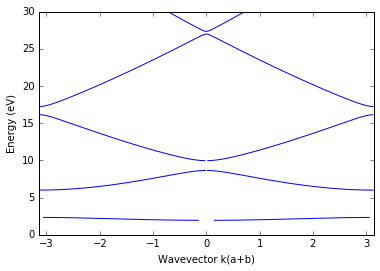

In [1]:
from numpy import abs,arccos,linspace,array,pi
from cmath import sqrt,sin,cos,cosh,sinh
from scipy import real_if_close
import matplotlib.pyplot as plt
from ipywidgets import interact
%matplotlib inline

hbar = 1.05457*10**-34 
echarge = 1.602*10**-19
emass = 9.109*10**-31 

def bandfunc(a,b,energy,v0):
    #b is the width of the potential barriers and a is the distance between them
    #energy is the value of energy in ElectronVolts that we are solving for
    #v0 is the height of the potential barriers in ElectronVolts
    if(energy==v0):
        return(None)
    result = None
    energy = energy*echarge
    v0 = v0*echarge
    b = b*10**-10
    a = a*10**-10
    
    alpha = sqrt((2*emass/hbar**2)*energy)
    beta = sqrt(2*emass*(v0-energy)/hbar**2)
    AlphaBeta_term = (beta**2 - alpha**2) /(2*alpha*beta)
    trace = cos(alpha*a)*cosh(beta*b) + AlphaBeta_term*sin(alpha*a)*sinh(beta*b)
    if abs(trace) < 1:
        result = real_if_close(arccos(trace))
    return(result)
    

def plotband(v0 = 6,a = 2.5,b = 2.5):
    energy_array = linspace(0.1,30,10000)
    #Calulate the positive k values
    k_vals = array([bandfunc(a,b,energy,v0) for energy in energy_array])
    #The negative k-values are just a mirror image of the positive ones
    neg_k_vals = array([-k if k is not None else None for k in k_vals])
    #generate the plot
    plt.plot(k_vals,energy_array,'b');
    plt.plot(neg_k_vals,energy_array,'b');
    plt.axis([-pi,pi, 0,30])
    plt.xlabel('Wavevector k(a+b)')
    plt.ylabel('Energy (eV)')

plotband(6,2.5,2.5)

Alternatively, we can allow the students to interact with the model using sliders. No need for them to modify the code. Note that the calculations are being preformed in real time!

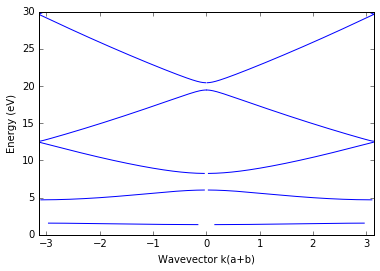

In [2]:
interact(plotband,
         v0=(0,10,0.1),
         a=(0,5,0.1),
         b=(0,5,0.1),
        );